<a href="https://colab.research.google.com/github/clothesstore024/Cloth-shop/blob/main/cloth_shop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/clothesstore024/Cloth-shop/main/cloth_shop.csv'
df = pd.read_csv(url, encoding='ISO-8859-1', delimiter=',')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [4]:
df.head(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


array([[<Axes: title={'center': '767'}>, <Axes: title={'center': '847'}>,
        <Axes: title={'center': '853'}>],
       [<Axes: title={'center': '858'}>,
        <Axes: title={'center': '1049'}>,
        <Axes: title={'center': '1065'}>],
       [<Axes: title={'center': '1077'}>,
        <Axes: title={'center': '1080'}>,
        <Axes: title={'center': '1095'}>],
       [<Axes: title={'center': '1120'}>, <Axes: >, <Axes: >]],
      dtype=object)

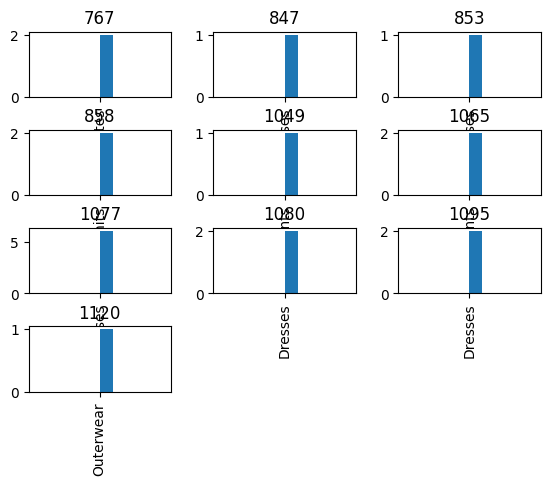

In [5]:
df.head(20).hist(by='Clothing ID',column = 'Class Name')

In [6]:
df['Age'].mean()

43.198543813335604

In [7]:
corr = df.corr()

<ipython-input-7-45893e33df67>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


In [8]:
import seaborn as sns

<Axes: >

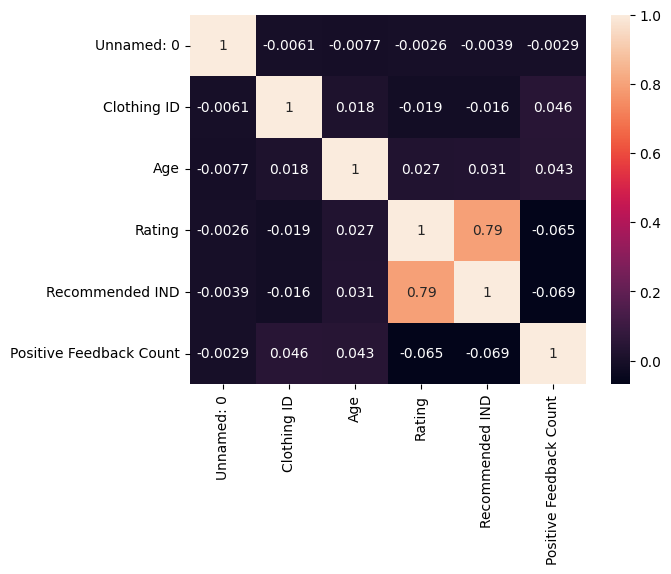

In [9]:
sns.heatmap(corr, annot=True)

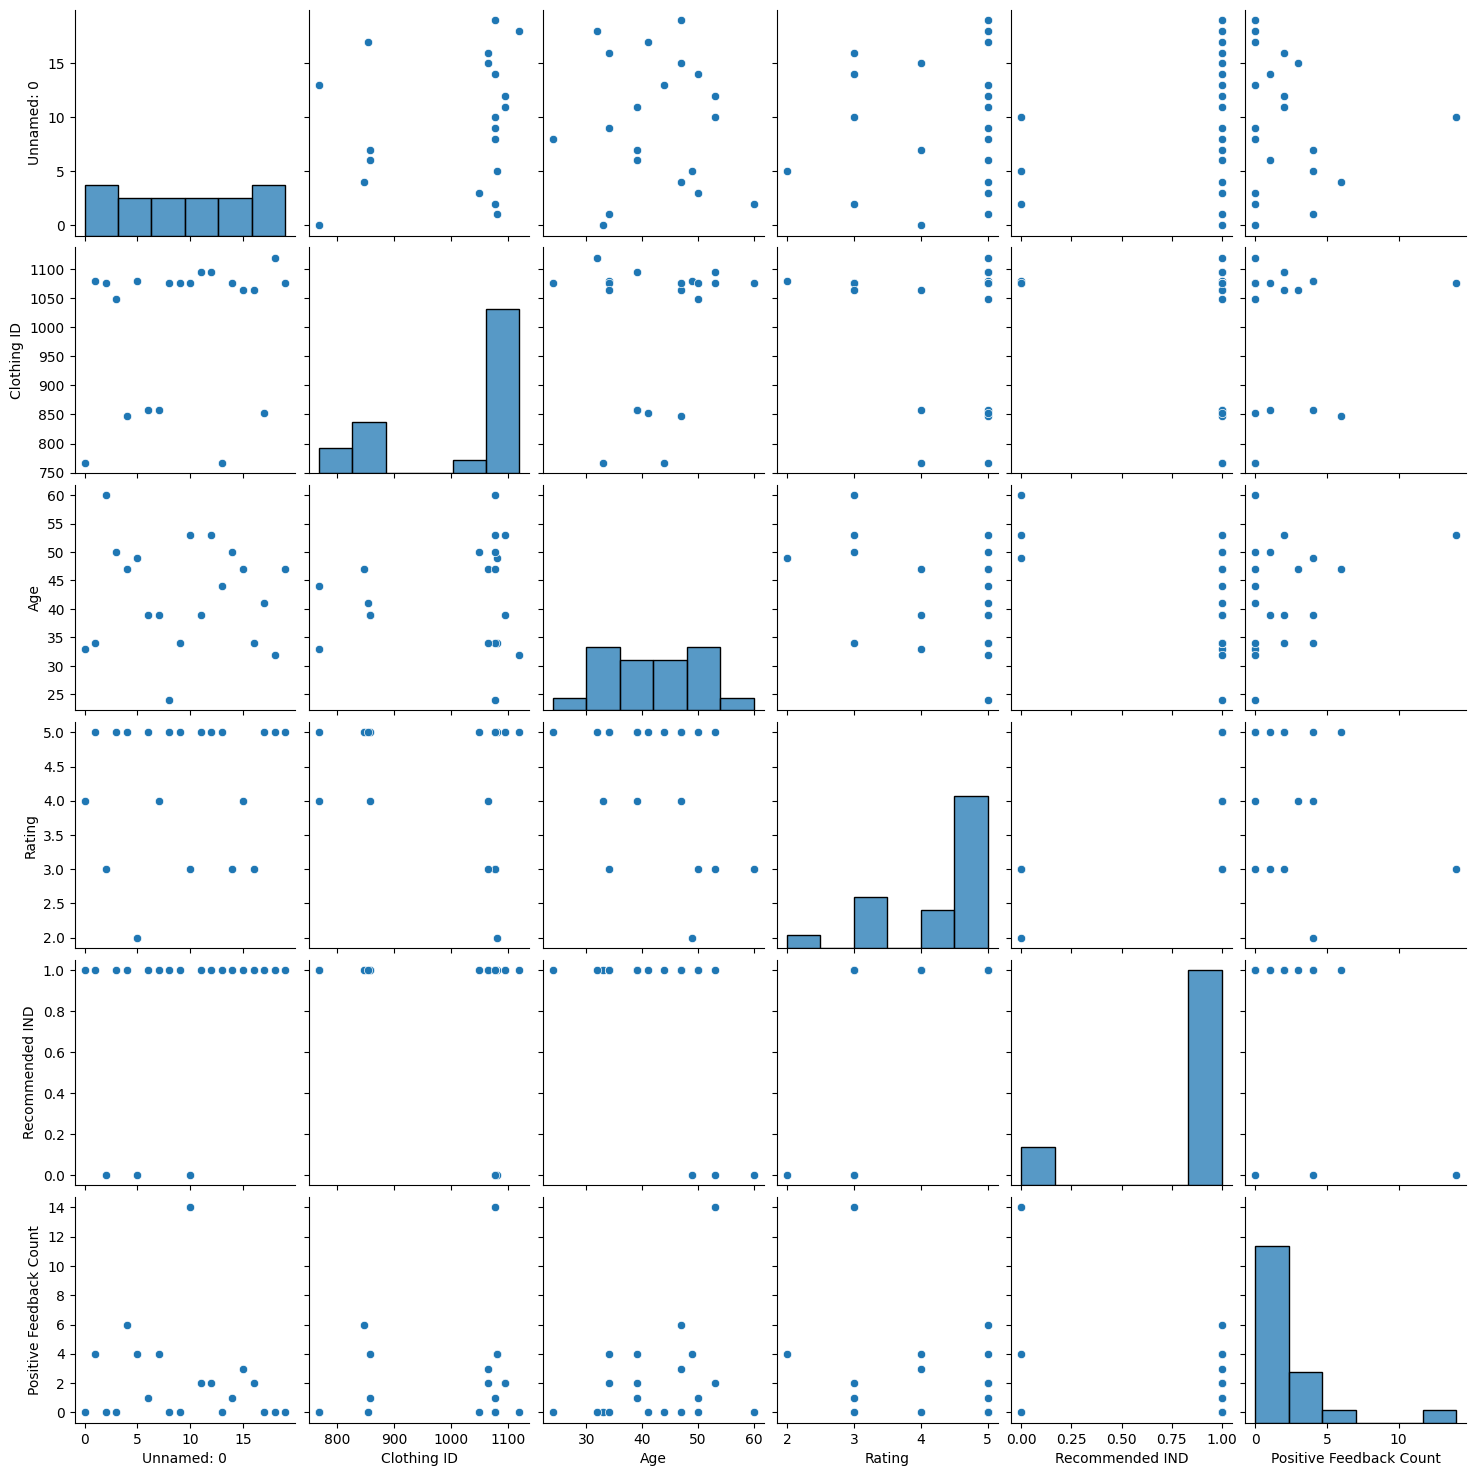

In [10]:
sns.pairplot(df.head(20))

In [11]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

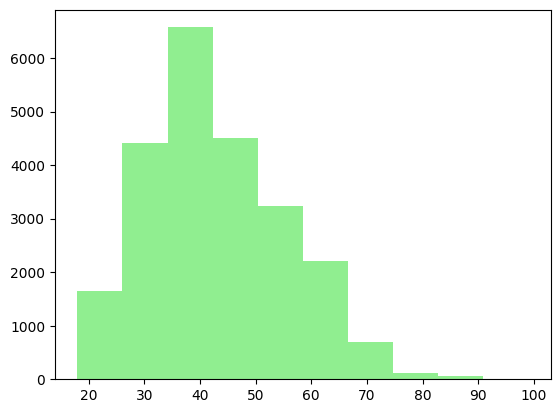

In [12]:
fig, ax = plt.subplots()
_ = plt.hist(df['Age'], color = 'lightgreen')

In [13]:
mean = df['Age'].mean()
mean

43.198543813335604

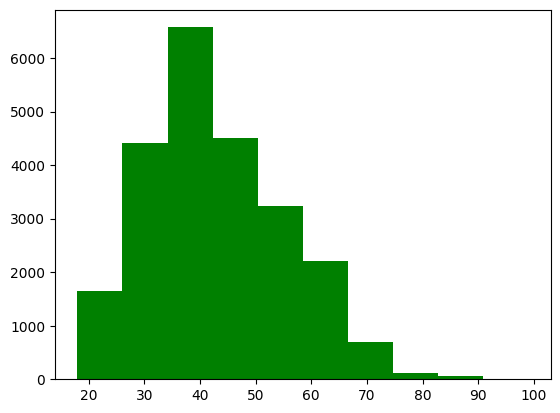

In [14]:
fig, ax = plt.subplots()

_ = plt.hist(df['Age'], color = 'green')

In [15]:
median = np.median(df['Age']) 

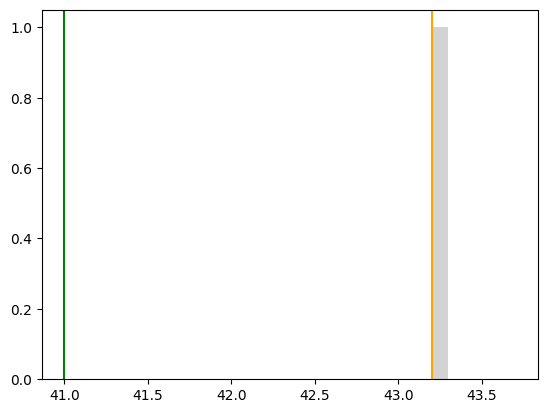

In [16]:
fig, ax = plt.subplots()
plt.axvline(mean, color='orange')
plt.axvline(median, color='green')
_ = plt.hist(mean, color = 'lightgray')

In [17]:
varianse  = df['Age'].var()
varianse

150.78719140721378

In [18]:
sigma = df['Age'].std()
sigma

12.279543615591493

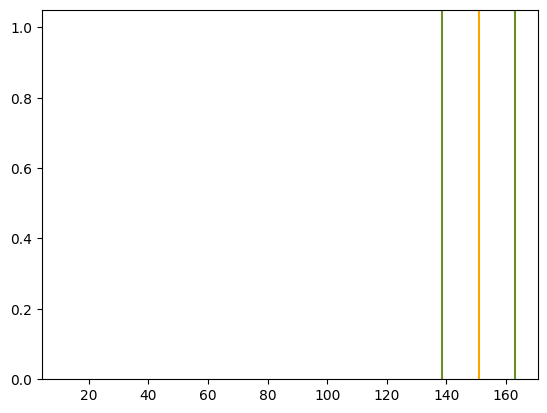

In [19]:
fig, ax = plt.subplots()
plt.axvline(varianse, color='orange')
plt.axvline(varianse+sigma, color='olivedrab')
plt.axvline(varianse-sigma, color='olivedrab')
_ = plt.hist(sigma, color = 'lightgray')

In [20]:
df['Age'].std()/(df['Age'].size)**(1/2)

0.08012678135503898

In [21]:
st.sem(df['Age'])

0.08012678135503898

In [22]:
st.sem(df['Age'], ddof=0)

0.0801250754954994

In [23]:
sns.set_style('ticks')

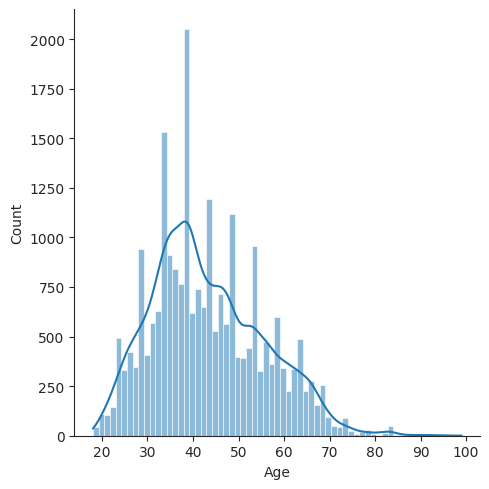

In [24]:
_ = sns.displot(df['Age'], kde=True)

In [25]:
df['Age'].mean()

43.198543813335604

In [26]:
df['Age'].std()

12.279543615591493

In [27]:
x1_sample = np.random.choice(df['Age'], size=5000, replace=False)
x2_sample = np.random.choice(df['Age'], size=10000, replace=False)

In [28]:
x1_sample.mean()

43.1512

In [29]:
x2_sample.mean()

43.2826

In [30]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

In [31]:
xc = sample_mean_calculator(df['Age'], 25, 7)

In [32]:
xc

[41.52, 44.64, 45.32, 40.64, 47.84, 46.12, 43.72]

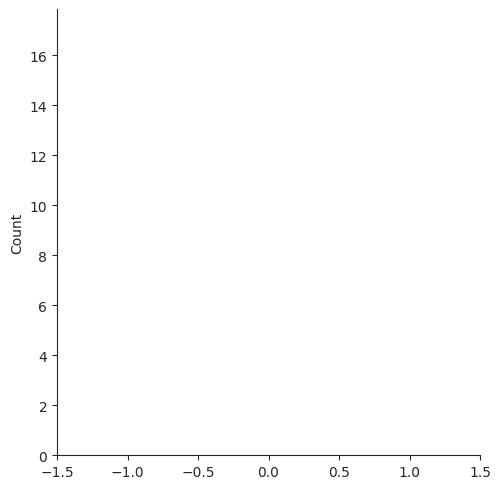

In [33]:
sns.displot(sample_mean_calculator(df['Age'], 25, 70), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

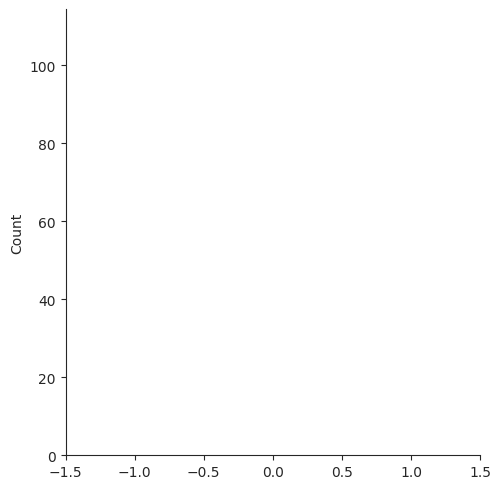

In [34]:
sns.displot(sample_mean_calculator(df['Age'], 10, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

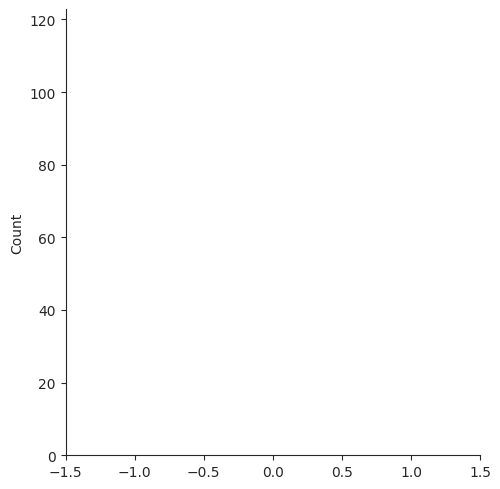

In [35]:
sns.displot(sample_mean_calculator(df['Age'], 100, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

In [36]:
s = st.skewnorm.rvs(10, size=10000)

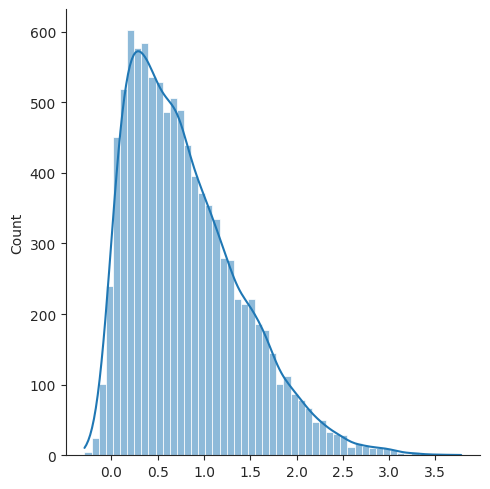

In [37]:
_ = sns.displot(s, kde=True)

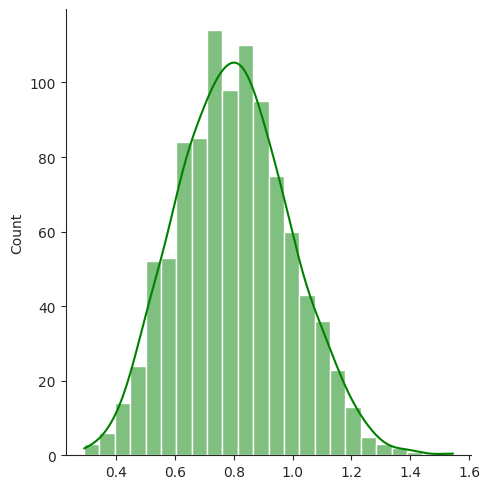

In [38]:
_ = sns.displot(sample_mean_calculator(s, 10, 1000), color='green', kde=True)

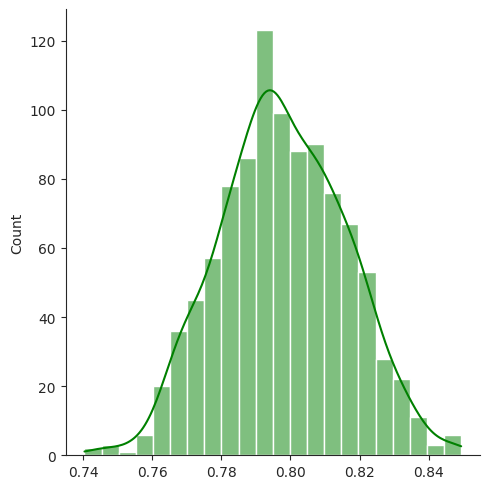

In [39]:
_ = sns.displot(sample_mean_calculator(s, 1000, 1000), color='green', kde=True)

In [40]:
u = np.random.uniform(size=10000)

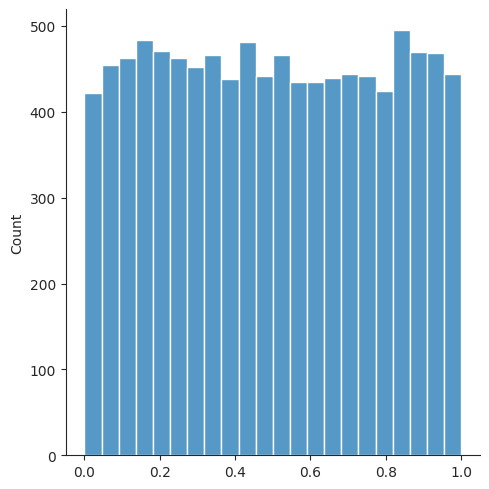

In [41]:
_ = sns.displot(u)

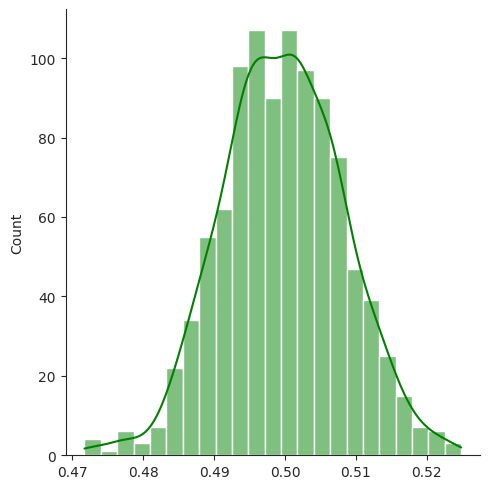

In [42]:
_ = sns.displot(sample_mean_calculator(u, 1000, 1000), color='green', kde=True)

In [43]:
x_i = 85
mu = 60
sigma = 10

In [44]:
x = np.random.normal(mu, sigma, 10000)

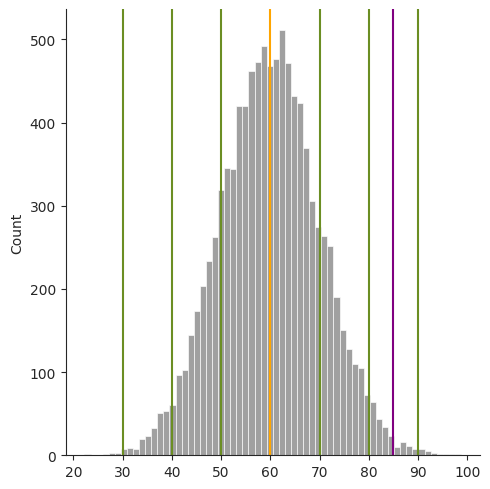

In [45]:
sns.displot(x, color='gray')
ax.set_xlim(50, 100)
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple')

In [46]:
z = (x_i - mu)/sigma
z

2.5

In [47]:
z = (x_i - np.mean(x))/np.std(x)
z

2.4943313224301398

In [48]:
len(np.where(x > 85)[0])

64

In [49]:
np.percentile(x, 99.5)

86.46625858867105

In [50]:
mu = 90
sigma = 2

In [51]:
y = np.random.normal(mu, sigma, 10000)

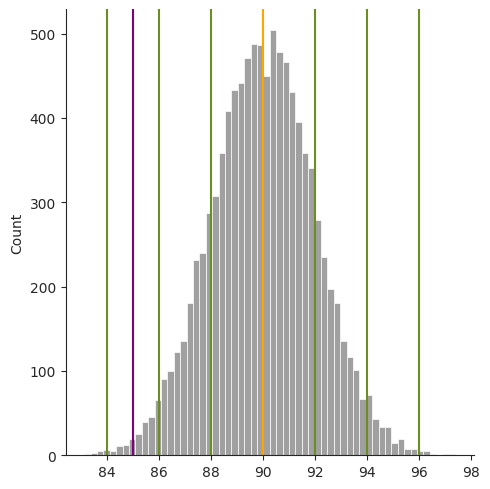

In [52]:
sns.displot(y, color='gray')
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple')

In [53]:
z = (x_i - mu)/sigma
z

-2.5

In [54]:
z = (x_i - np.mean(y))/np.std(y)
z

-2.5217614555238543

In [55]:
len(np.where(y > 85)[0])

9944

In [56]:
np.percentile(y, 1)

85.4011298754697

In [59]:
x = [48, 50, 54, 60]

In [60]:
xbar = np.mean(x)
xbar

53.0

In [61]:
sx = st.sem(x)
sx

2.6457513110645907

In [62]:
t = (xbar-50)/sx
t

1.1338934190276817

In [63]:
def p_from_t(my_t, my_n):
    return 2 * st.t.cdf(-abs(my_t), my_n-1)

In [64]:
p_from_t(t, len(x))

0.3392540508564543

In [65]:
st.ttest_1samp(x, 50)

TtestResult(statistic=1.1338934190276817, pvalue=0.3392540508564543, df=3)

In [66]:
penguins = sns.load_dataset('penguins').dropna() # some rows are missing data

In [67]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [68]:
np.unique(penguins.species, return_counts=True)

(array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 array([146,  68, 119]))

In [69]:
adelie = penguins[penguins.species == 'Adelie']

In [70]:
adelie

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,Female
148,Adelie,Dream,36.0,17.8,195.0,3450.0,Female
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male
150,Adelie,Dream,36.0,17.1,187.0,3700.0,Female


In [71]:
np.unique(adelie.island, return_counts=True)

(array(['Biscoe', 'Dream', 'Torgersen'], dtype=object), array([44, 55, 47]))

In [72]:
np.unique(adelie.sex, return_counts=True)

(array(['Female', 'Male'], dtype=object), array([73, 73]))

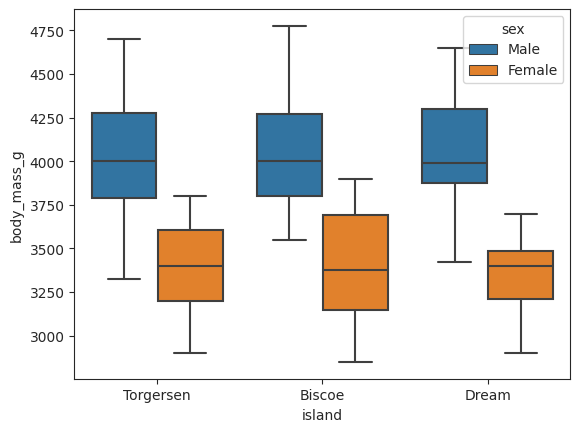

In [73]:
_ = sns.boxplot(x='island', y='body_mass_g', hue='sex', data=adelie)

In [74]:
f = adelie[adelie.sex == 'Female']['body_mass_g'].to_numpy()/1000
f

array([3.8  , 3.25 , 3.45 , 3.625, 3.2  , 3.7  , 3.45 , 3.325, 3.4  ,
       3.8  , 3.8  , 3.2  , 3.15 , 3.25 , 3.3  , 3.325, 3.55 , 3.3  ,
       3.15 , 3.1  , 3.   , 3.45 , 3.5  , 3.45 , 2.9  , 3.55 , 2.85 ,
       3.15 , 3.6  , 2.85 , 3.35 , 3.05 , 3.6  , 3.55 , 3.7  , 3.7  ,
       3.55 , 3.2  , 3.8  , 3.35 , 3.5  , 3.6  , 3.55 , 3.4  , 3.3  ,
       3.7  , 2.9  , 3.725, 3.075, 2.925, 3.75 , 3.175, 3.825, 3.2  ,
       3.9  , 2.9  , 3.35 , 3.15 , 3.45 , 3.05 , 3.275, 3.05 , 3.325,
       3.5  , 3.425, 3.175, 3.4  , 3.4  , 3.05 , 3.   , 3.475, 3.45 ,
       3.7  ])

In [75]:
m = adelie[adelie.sex == 'Male']['body_mass_g'].to_numpy()/1000
m

array([3.75 , 3.65 , 4.675, 3.8  , 4.4  , 4.5  , 4.2  , 3.6  , 3.95 ,
       3.8  , 3.55 , 3.95 , 3.9  , 3.9  , 4.15 , 3.95 , 4.65 , 3.9  ,
       4.4  , 4.6  , 3.425, 4.15 , 4.3  , 4.05 , 3.7  , 3.8  , 3.75 ,
       4.4  , 4.05 , 3.95 , 4.1  , 4.45 , 3.9  , 4.15 , 4.25 , 3.9  ,
       4.   , 4.7  , 4.2  , 3.55 , 3.8  , 3.95 , 4.3  , 4.45 , 4.3  ,
       4.35 , 4.1  , 4.725, 4.25 , 3.55 , 3.9  , 4.775, 4.6  , 4.275,
       4.075, 3.775, 3.325, 3.5  , 3.875, 4.   , 4.3  , 4.   , 3.5  ,
       4.475, 3.9  , 3.975, 4.25 , 3.475, 3.725, 3.65 , 4.25 , 3.75 ,
       4.   ])

In [76]:
fbar = f.mean()
fbar

3.368835616438356

In [77]:
mbar = m.mean()
mbar

4.043493150684932